In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import copy
import os
plt.rcParams['figure.figsize'] = (4.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [141]:
raw = []
black_and_white = []
clean_images = []

In [130]:
for filename in os.listdir('/Users/jdobrow/Desktop/Digits'):
    raw.append(plt.imread('/Users/jdobrow/Desktop/Digits/' + filename))

In [143]:
raw.append(plt.imread('/Users/jdobrow/Desktop/0.jpg'))

In [144]:
for img in raw:
    new_img = np.zeros((len(img), len(img[0])))
    for i in range(len(img)):
        for j in range(len(img[0])):           
            new_img[i][j] = img[i][j].sum()/3
    black_and_white.append(new_img)
        

In [145]:
for img in black_and_white:
    new_img = np.zeros((28,28))
    for i in range(28):
        for j in range(28):
            total = 0
            for k in range(len(img)//28 * i, len(img)//28 * (i + 1)):
                for l in range(len(img[k])//28 * j, len(img[k])//28 * (j + 1)):
                    total += img[k][l]
            new_img[i][j] = total/(len(img)**2)
    clean_images.append(new_img)

In [146]:
for img in clean_images:
    total = []
    for col in range(len(img)):
        for row in range(len(img[i])):
            total.append(img[col][row])
    threshold = np.median(total)
    
    on_count = 0
    off_count = 0
    for j in range(28):
        for k in range(28):
            if img[j][k] >= threshold:
                img[j][k] = 1
                on_count += 1
            else:
                img[j][k] = 0
                off_count += 1
    if on_count > off_count:
        for j in range(28):
            for k in range(28):
                if img[j][k] == 1:
                    img[j][k] = 0
                else:
                    img[j][k] = 1

In [147]:
np.save('/Users/jdobrow/Desktop/Data Science/Capstone 3 Files/image', clean_images)

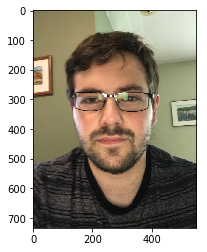

In [148]:
for i in raw:
    plt.imshow(i)
    plt.show()

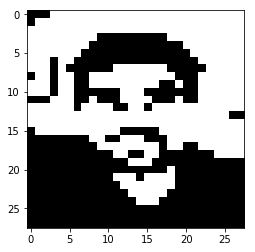

In [150]:
plt.imshow(clean_images[0])